# 1. Develop a DCGAN model for CIFAR-10 small object Photograph Dataset, for implement this model - create a generator and discriminator model and then generate the new set of fake images to ensure the GAN outcome.

# 2. Explore the Latent Space when Generating images.

In [1]:
from keras.datasets.cifar10 import load_data
import matplotlib.pyplot as plt

In [2]:
(xtrain,ytrain),(xtest,ytest)=load_data()
print('Train Shape:\t',xtrain.shape,ytrain.shape)
print()
print('Test shape:\t',xtest.shape,ytest.shape)

Train Shape:	 (50000, 32, 32, 3) (50000, 1)

Test shape:	 (10000, 32, 32, 3) (10000, 1)


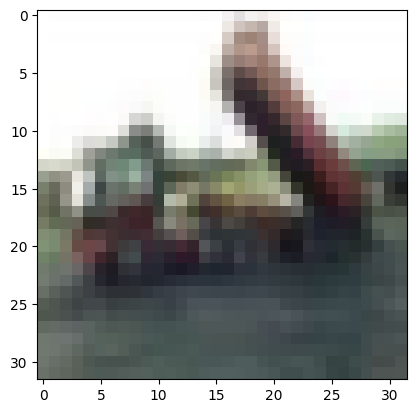

In [3]:
plt.imshow(xtrain[2],cmap='gray')

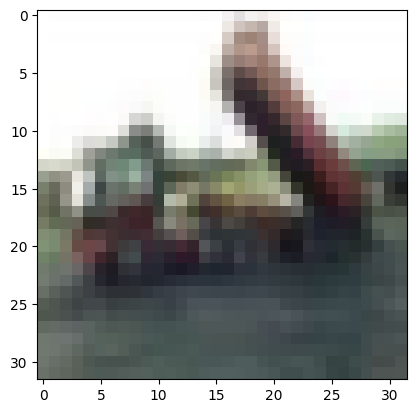

In [4]:
plt.imshow(xtrain[2],cmap='gray_r')

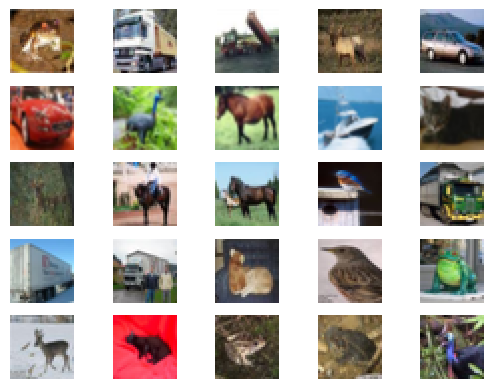

In [5]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.axis('off')
    plt.imshow(xtrain[i],cmap='gray_r')
    
plt.show()

In [6]:
from keras.layers import Dense
from keras.layers import Conv2D,Flatten,Dropout
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from keras.utils import plot_model
from keras.models import Sequential

In [7]:
def discriminator(in_shape=(32,32,3)):
    model=Sequential()
   
   
    model.add(Conv2D(64,(3,3),strides=(2,2),padding='same',
                     input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    
    
    model.add(Conv2D(64,(3,3),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    
    
    model.add(Flatten())
    
    
    model.add(Dense(1,activation='sigmoid'))
    
    
    opt=Adam(learning_rate=0.0002,beta_1=0.5)
    
    model.compile(loss='binary_crossentropy',optimizer=opt,
                  metrics=['accuracy'])
                  
    return model
                  
model=discriminator()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 64)        1792      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 16, 16, 64)        0         
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 8, 8, 64)          0         
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 64)          0         
                                                                 
 flatten (Flatten)           (None, 4096)              

In [8]:
from numpy import expand_dims,ones,zeros

def load_real_samples():
    (xtrain,_),(_,_)=load_data()
    x=expand_dims(xtrain,axis=-1)
    x=x.astype('float32')
    x=x/255.
    return x

In [9]:
load_real_samples()

array([[[[[0.23137255],
          [0.24313726],
          [0.24705882]],

         [[0.16862746],
          [0.18039216],
          [0.1764706 ]],

         [[0.19607843],
          [0.1882353 ],
          [0.16862746]],

         ...,

         [[0.61960787],
          [0.5176471 ],
          [0.42352942]],

         [[0.59607846],
          [0.49019608],
          [0.4       ]],

         [[0.5803922 ],
          [0.4862745 ],
          [0.40392157]]],


        [[[0.0627451 ],
          [0.07843138],
          [0.07843138]],

         [[0.        ],
          [0.        ],
          [0.        ]],

         [[0.07058824],
          [0.03137255],
          [0.        ]],

         ...,

         [[0.48235294],
          [0.34509805],
          [0.21568628]],

         [[0.46666667],
          [0.3254902 ],
          [0.19607843]],

         [[0.47843137],
          [0.34117648],
          [0.22352941]]],


        [[[0.09803922],
          [0.09411765],
          [0.08235294]],

    

In [10]:
from numpy.random import rand,randint

def generate_real_samples(dataset,n_samples):
    ix=randint(0,dataset.shape[0],n_samples)
    x=dataset[ix]
   
    y=ones((n_samples,1))
    return x,y

In [11]:
generate_real_samples(load_real_samples(),n_samples=10)

(array([[[[[1.        ],
           [1.        ],
           [1.        ]],
 
          [[0.99215686],
           [0.99215686],
           [0.99215686]],
 
          [[0.99607843],
           [0.99607843],
           [0.99607843]],
 
          ...,
 
          [[0.5176471 ],
           [0.62352943],
           [0.6666667 ]],
 
          [[0.42745098],
           [0.53333336],
           [0.5764706 ]],
 
          [[0.33333334],
           [0.4392157 ],
           [0.48235294]]],
 
 
         [[[0.99607843],
           [0.99607843],
           [0.99607843]],
 
          [[0.9882353 ],
           [0.9843137 ],
           [0.9843137 ]],
 
          [[0.9882353 ],
           [0.9882353 ],
           [0.9882353 ]],
 
          ...,
 
          [[0.34509805],
           [0.4509804 ],
           [0.49019608]],
 
          [[0.36078432],
           [0.46666667],
           [0.50980395]],
 
          [[0.45490196],
           [0.56078434],
           [0.6039216 ]]],
 
 
         [[[1.        ],

In [12]:
def generate_fake_samples(n_samples):
    x=rand(32*32*3*n_samples)
    
    x=x.reshape(n_samples,32,32,3)
    
    #generate fake class labels
    y=zeros((n_samples,1))
    
    return x,y

In [13]:
generate_fake_samples(10)

(array([[[[0.79203389, 0.45961333, 0.8500065 ],
          [0.16318688, 0.20122802, 0.90092424],
          [0.21948445, 0.79915724, 0.16595257],
          ...,
          [0.04529677, 0.3537086 , 0.04945611],
          [0.73985383, 0.10576734, 0.36007411],
          [0.95702643, 0.65888655, 0.74285514]],
 
         [[0.55579652, 0.86318527, 0.31701405],
          [0.1074732 , 0.30096375, 0.66893286],
          [0.52713816, 0.14494213, 0.8626204 ],
          ...,
          [0.97936434, 0.20226808, 0.88760001],
          [0.16789273, 0.6816866 , 0.61666305],
          [0.54925648, 0.81925882, 0.97354934]],
 
         [[0.61987216, 0.73273224, 0.37365508],
          [0.89786485, 0.61059334, 0.20548788],
          [0.03135236, 0.88026966, 0.38899412],
          ...,
          [0.24398394, 0.45555977, 0.39848039],
          [0.23848157, 0.01082925, 0.11171437],
          [0.0350058 , 0.04321451, 0.23640475]],
 
         ...,
 
         [[0.87609191, 0.81477258, 0.48454575],
          [0.50134

In [14]:
def train_discriminative(model,dataset,n_iter=100,n_batch=256):
    half_batch=int(n_batch//2)
    
    for i in range(n_iter):
        
        xreal,yreal=generate_real_samples(dataset,half_batch)
        
       
        AA,real_acc=model.train_on_batch(xreal,yreal)
        
        
        xfake,yfake=generate_fake_samples(half_batch)
        
        
        BB,fake_acc=model.train_on_batch(xfake,yfake)
        
        
        print('>%d real=%.0f%% fake=%.0f%%'%(i+1,real_acc*100,fake_acc*100))

In [15]:
model=discriminator()


dataset=load_real_samples()

In [16]:
train_discriminative(model,dataset)



>1 real=48% fake=17%
>2 real=67% fake=22%
>3 real=61% fake=25%
>4 real=61% fake=26%
>5 real=62% fake=37%
>6 real=56% fake=34%
>7 real=62% fake=38%
>8 real=56% fake=48%
>9 real=55% fake=48%
>10 real=50% fake=44%
>11 real=49% fake=55%
>12 real=38% fake=61%
>13 real=45% fake=55%
>14 real=34% fake=62%
>15 real=35% fake=65%
>16 real=44% fake=61%
>17 real=36% fake=74%
>18 real=45% fake=73%
>19 real=38% fake=70%
>20 real=38% fake=73%
>21 real=28% fake=73%
>22 real=36% fake=68%
>23 real=34% fake=77%
>24 real=28% fake=70%
>25 real=33% fake=79%
>26 real=41% fake=78%
>27 real=40% fake=84%
>28 real=31% fake=79%
>29 real=34% fake=84%
>30 real=39% fake=84%
>31 real=44% fake=81%
>32 real=39% fake=84%
>33 real=34% fake=83%
>34 real=34% fake=86%
>35 real=34% fake=86%
>36 real=41% fake=91%
>37 real=41% fake=86%
>38 real=33% fake=85%
>39 real=38% fake=86%
>40 real=34% fake=91%
>41 real=43% fake=92%
>42 real=41% fake=91%
>43 real=42% fake=90%
>44 real=34% fake=95%
>45 real=39% fake=94%
>46 real=36% fake

In [17]:
from keras.layers import Reshape
from keras.layers import Conv2DTranspose

def generator(latent_dim):
    model = Sequential()
   
    n_nodes = 128 * 8 * 8
    model.add(Dense(n_nodes, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((8, 8, 128)))
    
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    # Adjust the number of filters to match the number of channels in your data (3 for RGB)
    model.add(Conv2D(3, (7,7), activation='tanh', padding='same'))
    return model

latent_dim = 100
model = generator(latent_dim)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8192)              827392    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 8192)              0         
                                                                 
 reshape (Reshape)           (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 16, 16, 128)       262272    
 anspose)                                                        
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 32, 32, 128)       262272    
 Transpose)                                           

In [18]:
import numpy as np
from numpy.random import randn

def generate_latent_points(latent_dim, n_samples):
   
    x_input = randn(latent_dim * n_samples)
    
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

In [19]:
def generate_fake_samples(g_model, latent_dim, n_samples):
    
    x_input = generate_latent_points(latent_dim, n_samples)
    X = g_model.predict(x_input)
    y = zeros((n_samples, 1))
    return X, y

1/1 [==============================] - 0s 150ms/step


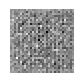

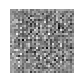

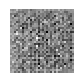

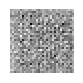

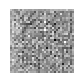

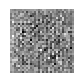

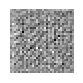

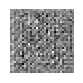

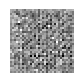

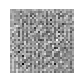

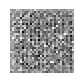

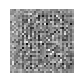

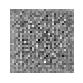

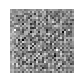

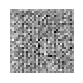

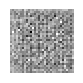

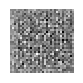

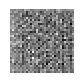

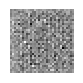

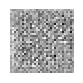

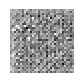

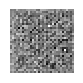

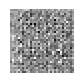

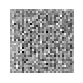

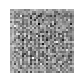

In [20]:
latent_dim = 100
model = generator(latent_dim)
n_samples = 25
x, _ = generate_fake_samples(model, latent_dim, n_samples)
for i in range(n_samples):
    plt.subplot(5, 5, 1 + i)
    plt.axis('off')
    plt.imshow(x[i, :, :, 0], cmap='gray_r')
    plt.show()

1/1 [==============================] - 0s 33ms/step


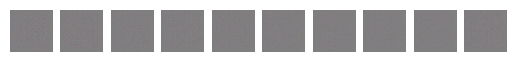

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate images from latent vectors
def generate_images(generator, latent_vectors):
    generated_images = generator.predict(latent_vectors)
    return generated_images

# Generate random latent vectors
num_samples = 10
latent_dim = 100
random_latent_vectors = np.random.normal(size=(num_samples, latent_dim))

# Generate images from random latent vectors
generated_images = generate_images(model, random_latent_vectors)

# Visualize the generated images
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow((generated_images[i] + 1) / 2.0)  # Rescale pixel values to the range [0, 1]
    plt.axis('off')

plt.show()